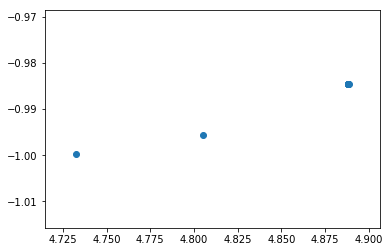

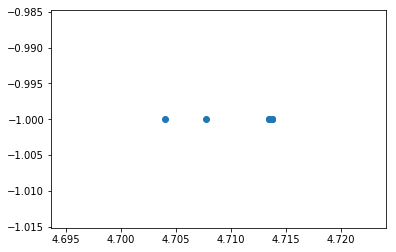

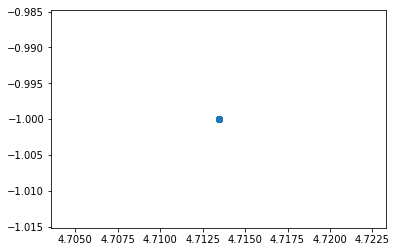

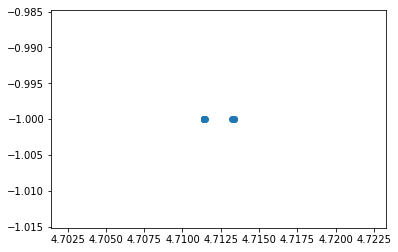

array([[4.91949637],
       [4.88812763],
       [4.88825803],
       [4.7322425 ],
       [4.7322425 ],
       [4.73041271],
       [4.7137554 ],
       [4.71364283],
       [4.71344174],
       [4.71344174],
       [4.71344174],
       [4.71344174],
       [4.71344173],
       [4.71344173],
       [4.71344173],
       [4.71344173],
       [4.71138014],
       [4.71139687],
       [4.71334235],
       [4.71326686]])

In [43]:
#Generating Initial Population
import numpy as np
import matplotlib.pyplot as plt
d=1
N=10
xmin=0
xmax=6.2832
iterations=10
def POP(d,N,xmin,xmax):
    return (np.random.rand(N,d)*xmax)
pop=POP(d,N,xmin,xmax)
#fitness
def fitness(pop):
    return np.sin(pop)
def findfitness(pop):
    return np.apply_along_axis(fitness,1,pop)
bests=np.empty((20,1))
for j in range(0,20):
        fit=findfitness(pop)
        #Tournament Selection
        parent=np.empty(N)
        for i in range(0,N):
            r1=np.random.randint(0,10)
            r2=r1
            while r2==r1:
                r2=np.random.randint(0,10)
            if fit[r1]<fit[r2]:
                parent[i]=pop[r1]
            else:
                parent[i]=pop[r2]
        #crossover
        Pc=0.8
        Uc=20
        child=np.empty((int((Pc*N)),1))
        for i in range(0,int(Pc*N),2):
            r=np.random.rand()
            if r<=0.5:
                b=(2*r)**(1/(1+Uc))
            else:
                b=1/((2*(1-r))**(1/(1+Uc)))
            child[i]= ((1+b)*parent[i]+(1-b)*parent[i+1])/2
            child[i+1] =((1-b)*parent[i]+(1+b)*parent[i+1])/2
        #Mutation
        mpop=np.concatenate((pop, child), axis=0)
        Pm=0.2
        Um=20
        for i in range(0,int(Pm*mpop.shape[0])):
            r3=np.random.randint(0,mpop.shape[0])
            r4=np.random.rand()
            if r4<=0.5:
                d=((2*r4)**(1/(1+Um)))-1
            else:
                d=1-((2*(1-r4))**(1/(1+Um)))
            mpop[r3]+=d
        fitness_b=findfitness(mpop)
        sortindex=np.argsort(fitness_b,axis=0)
        mpop=mpop[sortindex,:].reshape(int(N+(Pc*N)),1)
        newgen=mpop[0:N,:]
        fitness_a=findfitness(newgen)
        if (j+1)%5==0:
            plt.scatter(newgen,fitness_a)
            plt.show()
        bests[j]=newgen[0]        
        pop=newgen
bests